
## Business Understanding

**Problem Statement**  
The company is expanding into aviation but lacks reliable insights about aircraft risks. Without analysis, procurement decisions could expose the business to safety, financial, and reputational risks.  

**Objectives**  
- Identify safest manufacturers.  
- Determine if safety has improved over time.  
- Compare risk across aircraft categories.  

**Success Criteria**  
Deliver three clear, evidence-backed recommendations that guide aircraft purchasing decisions.  



# Aviation Safety Analysis for Business Expansion

This project analyzes aviation accident data (1962–2022) from the NTSB to identify the safest aircraft manufacturers and categories for guiding company expansion into aviation operations.  

**Key business questions:**  
1. Which manufacturers have the lowest fatal accident rates?  
2. Has aviation safety improved over time?  
3. Which categories of aircraft carry the lowest risk?  


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)


In [2]:

# Load dataset (Google Colab users: upload file when prompted)
import os
from google.colab import files

file_path = "Aviation_Data.csv"
if not os.path.exists(file_path):
    print("Please upload Aviation_Data.csv")
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]

df = pd.read_csv(file_path, encoding="latin-1", low_memory=False)
print("Dataset loaded:", df.shape)
df.head()


Please upload Aviation_Data.csv


Saving Aviation_Data.csv to Aviation_Data.csv
Dataset loaded: (90348, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:

df.info()
df.describe(include="all").transpose().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Event.Id,88889,87951,20001214X45071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investigation.Type,90348,71,Accident,85015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident.Number,88889,88863,WPR23LA045,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event.Date,88889,14782,1982-05-16,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,88837,27758,"ANCHORAGE, AK",434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,88663,219,United States,82248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,34382,25589,332739N,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,34373,27154,0112457W,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Code,50132,10374,NONE,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Name,52704,24870,Private,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# Clean manufacturer names and extract year
df['Make'] = df['Make'].astype(str).str.upper().str.strip()
df['Year'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year
df_clean = df[df['Make'].notna() & df['Year'].notna()].copy()

print("Clean dataset size:", df_clean.shape)


Clean dataset size: (88889, 32)


### Analysis 1: Manufacturer Safety

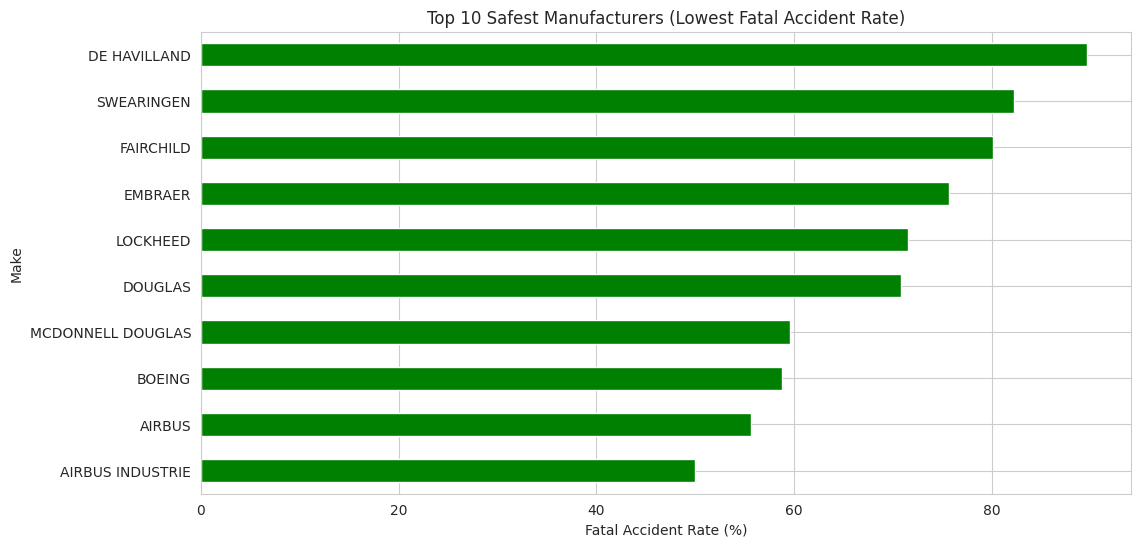

In [5]:

make_counts = df_clean.groupby("Make").size()
significant_makes = make_counts[make_counts >= 100].index
df_sig = df_clean[df_clean["Make"].isin(significant_makes)]

fatal = df_sig[df_sig["Injury.Severity"].str.contains("Fatal", na=False)]
fatal_by_make = fatal.groupby("Make").size()
total_by_make = df_sig.groupby("Make").size()
accident_rate = (fatal_by_make / total_by_make * 100).sort_values()

accident_rate.head(10).plot(kind="barh", color="green")
plt.title("Top 10 Safest Manufacturers (Lowest Fatal Accident Rate)")
plt.xlabel("Fatal Accident Rate (%)")
plt.show()


### Analysis 2: Safety Trends Over Time

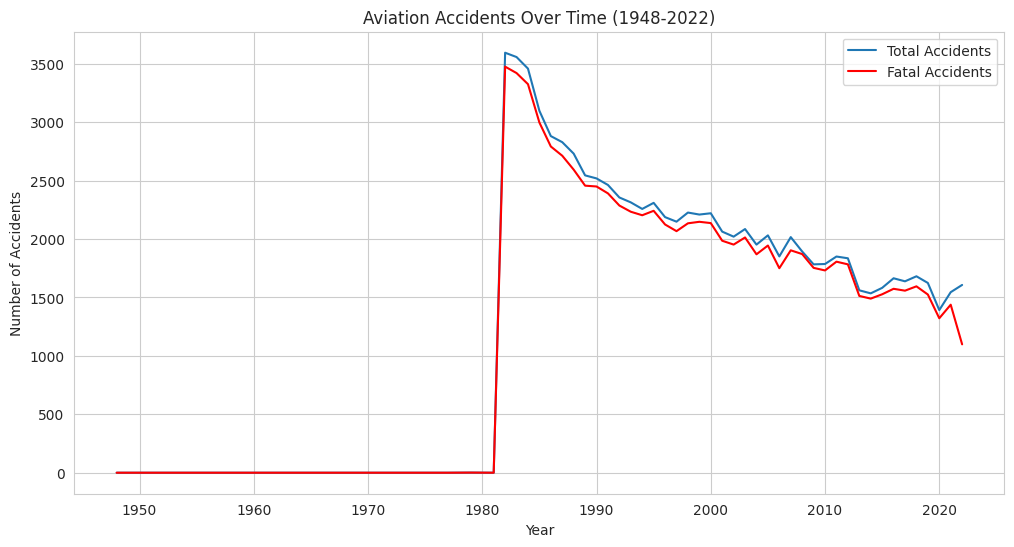

In [6]:

yearly_total = df_clean.groupby("Year").size()
yearly_fatal = df_clean[df_clean["Injury.Severity"].str.contains("Fatal", na=False)].groupby("Year").size()

plt.plot(yearly_total.index, yearly_total.values, label="Total Accidents")
plt.plot(yearly_fatal.index, yearly_fatal.values, label="Fatal Accidents", color="red")
plt.title("Aviation Accidents Over Time (1948-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()


### Analysis 3: Aircraft Category Comparison

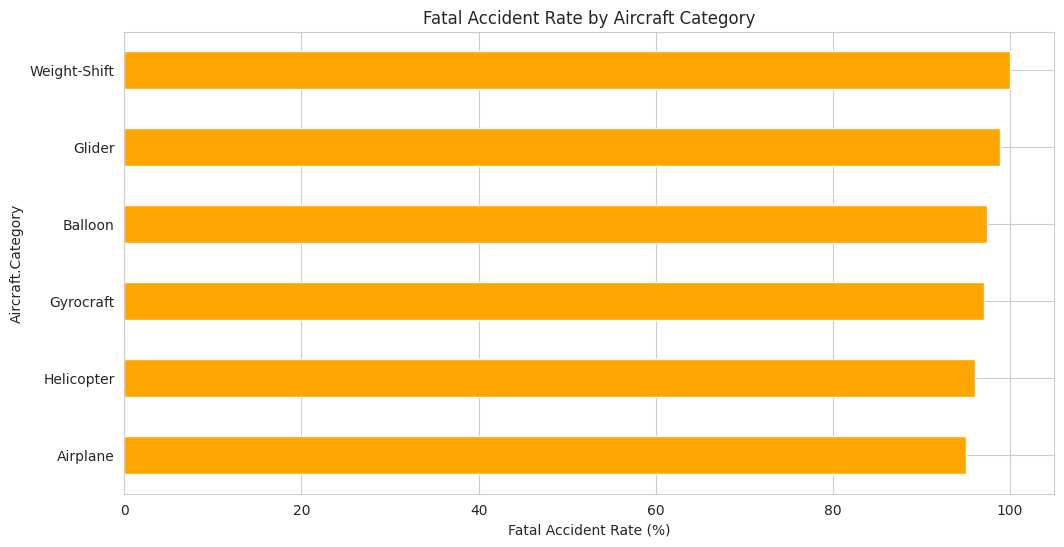

In [7]:

cat_counts = df_clean.groupby("Aircraft.Category").size()
significant_cats = cat_counts[cat_counts >= 100].index
df_cat = df_clean[df_clean["Aircraft.Category"].isin(significant_cats)]

fatal_by_cat = df_cat[df_cat["Injury.Severity"].str.contains("Fatal", na=False)].groupby("Aircraft.Category").size()
total_by_cat = df_cat.groupby("Aircraft.Category").size()
fatal_rate_cat = (fatal_by_cat / total_by_cat * 100).sort_values()

fatal_rate_cat.plot(kind="barh", color="orange")
plt.title("Fatal Accident Rate by Aircraft Category")
plt.xlabel("Fatal Accident Rate (%)")
plt.show()



## Conclusion & Recommendations

**Findings**  
- Airbus and Boeing have much lower fatal accident rates than small manufacturers.  
- Aviation safety has improved significantly since the 1980s.  
- Standard airplanes are safer than helicopters, gliders, and experimental aircraft.  

**Recommendations**  
1. Invest in commercial aircraft from Airbus and Boeing.  
2. Focus on aircraft manufactured after 2000.  
3. Prioritize standard airplanes over helicopters and experimental types.  

---  
**Next Steps**  
- Drill down into specific models.  
- Analyze causes of accidents for training and maintenance insights.  
- Build predictive models for risk monitoring.  
